In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

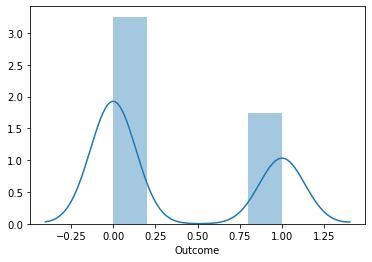

In [5]:
sns.distplot(df['Outcome'])

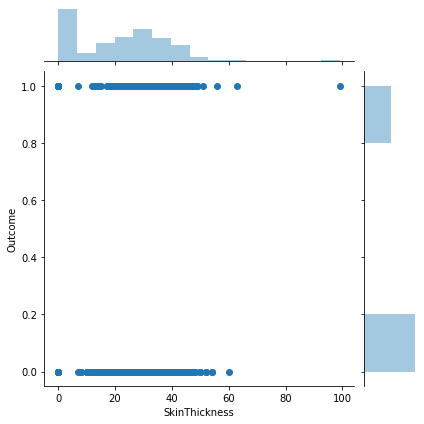

In [6]:
sns.jointplot(df['SkinThickness'],df['Outcome'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


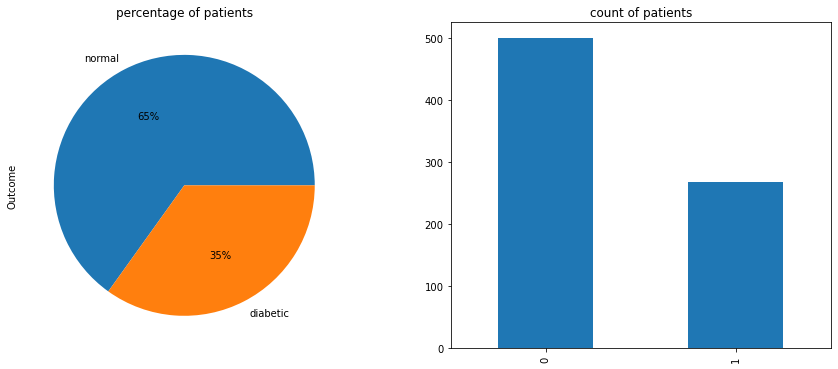

In [8]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1=df['Outcome'].value_counts().plot.pie(x='diabetes',y='no of patients',autopct="%1.0f%%",labels=['normal','diabetic'],ax=ax1)
ax1.set(title='percentage of patients')
ax2=df['Outcome'].value_counts().plot(kind='bar',ax=ax2)
ax2.set(title='count of patients')
plt.show()

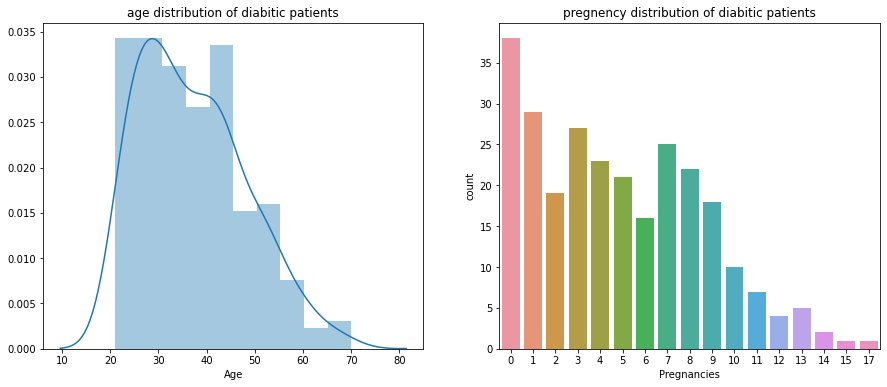

In [9]:
value0=df[df['Outcome']==0]
value1=df[df['Outcome']==1]
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value1['Age'])
plt.title('age distribution of diabitic patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value1['Pregnancies'])
plt.title('pregnency distribution of diabitic patients')
plt.show()

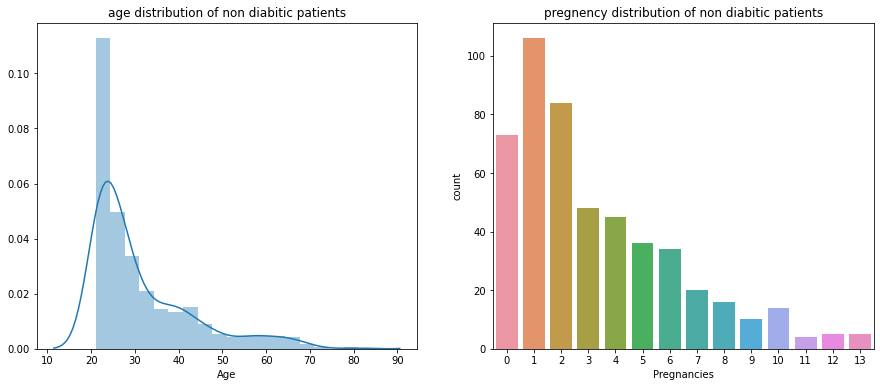

In [10]:
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value0['Age'])
plt.title('age distribution of non diabitic patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value0['Pregnancies'])
plt.title('pregnency distribution of non diabitic patients')
plt.show()

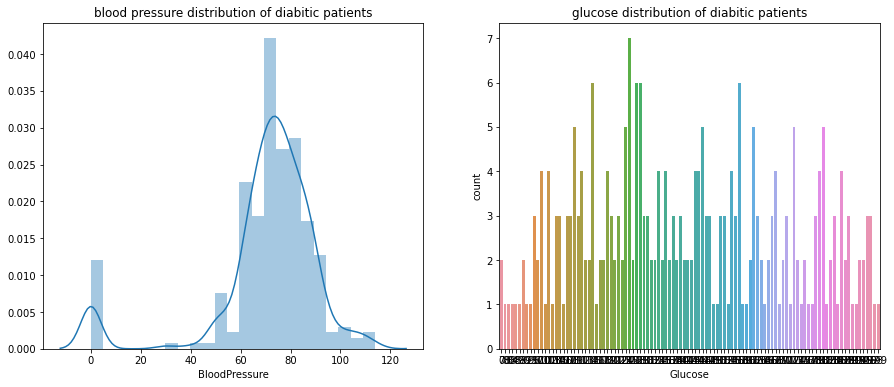

In [11]:
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value1['BloodPressure'])
plt.title('blood pressure distribution of diabitic patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value1['Glucose'])
plt.title('glucose distribution of diabitic patients')
plt.show()

In [12]:
q1=df['BloodPressure'].quantile(0.25)
q3=df['BloodPressure'].quantile(0.75)
iqr=q3-q1
filt_df=df.query('(@q1-1.5*@iqr)<= BloodPressure<=(@q3+1.5*@iqr)')
filt_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[723 rows x 9 columns]

In [13]:
df=filt_df

In [14]:
df.shape

(723, 9)

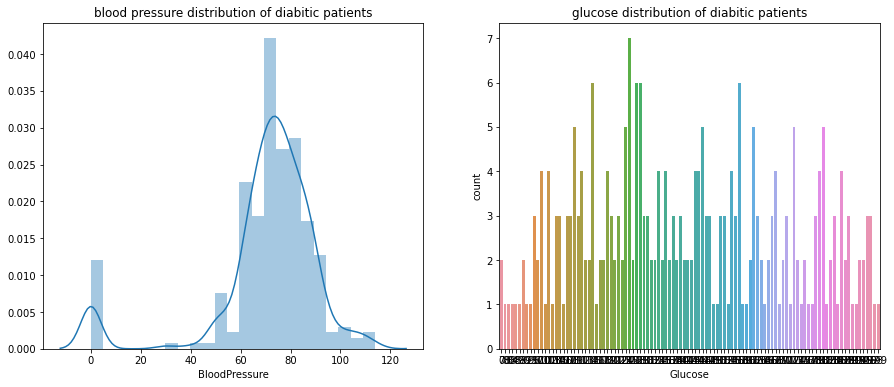

In [15]:
fig=plt.figure(figsize=(15,6))
ax1=plt.subplot2grid((1,2),(0,0))
sns.distplot(value1['BloodPressure'])
plt.title('blood pressure distribution of diabitic patients')

ax2=plt.subplot2grid((1,2),(0,1))
sns.countplot(value1['Glucose'])
plt.title('glucose distribution of diabitic patients')
plt.show()

In [16]:
q1=df['Glucose'].quantile(0.25)
q3=df['Glucose'].quantile(0.75)
iqr=q3-q1
filt_df=df.query('(@q1-1.5*@iqr)<= Glucose<=(@q3+1.5*@iqr)')
filt_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[718 rows x 9 columns]

In [17]:
df=filt_df

In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   718.000000  718.000000     718.000000     718.000000  718.000000   
mean      3.860724  121.811978      72.240947      21.356546   84.520891   
std       3.353649   30.617668      11.487141      15.705213  117.242118   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.500000   48.000000   
75%       6.000000  141.000000      80.000000      33.000000  131.500000   
max      17.000000  199.000000     106.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  718.000000                718.000000  718.000000  718.000000  
mean    32.153760                  0.477648   33.344011    0.341226  
std      7.077801                  0.336281   11.822374    0.474451  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.400000                  0.245000   24.000000    0.000000  
50%     32.150000                  0.380500   29.000000    0.000000  
75%     36.500000                  0.630500   41.000000    1.000000  
max     59.400000                  2.420000   81.000000    1.000000

In [19]:
q1=df['SkinThickness'].quantile(0.25)
q3=df['SkinThickness'].quantile(0.75)
iqr=q3-q1
filt_df=df.query('(@q1-1.5*@iqr)<= SkinThickness<=(@q3+1.5*@iqr)')
filt_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[717 rows x 9 columns]

In [20]:
df=filt_df
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   717.000000  717.000000     717.000000     717.000000  717.000000   
mean      3.863319  121.707113      72.244073      21.248257   84.638773   
std       3.355269   30.509740      11.494855      15.445607  117.281375   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000  100.000000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   48.000000   
75%       6.000000  141.000000      80.000000      33.000000  132.000000   
max      17.000000  199.000000     106.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  717.000000                717.000000  717.000000  717.000000  
mean    32.150209                  0.477512   33.304045    0.340307  
std      7.082102                  0.336496   11.781988    0.474143  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.400000                  0.245000   24.000000    0.000000  
50%     32.100000                  0.380000   29.000000    0.000000  
75%     36.500000                  0.631000   41.000000    1.000000  
max     59.400000                  2.420000   81.000000    1.000000

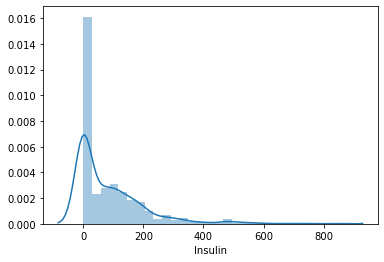

In [21]:
sns.distplot(df['Insulin'])

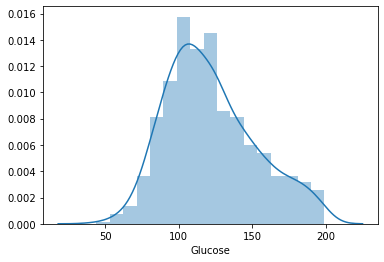

In [22]:
sns.distplot(df['Glucose'])

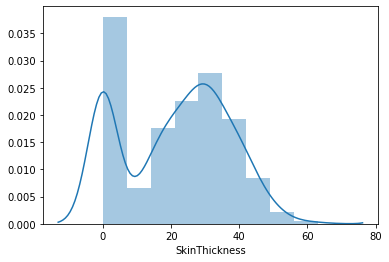

In [23]:
sns.distplot(df['SkinThickness'])

In [24]:
q1=df['Insulin'].quantile(0.25)
q3=df['Insulin'].quantile(0.75)
iqr=q3-q1
filt_df=df.query('(@q1-1.5*@iqr)<= Insulin<=(@q3+1.5*@iqr)')
filt_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[690 rows x 9 columns]

In [25]:
df=filt_df
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   690.000000  690.000000     690.000000     690.000000  690.000000   
mean      3.878261  120.186957      72.343478      20.791304   68.737681   
std       3.371909   29.771234      11.451139      15.439754   83.740992   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  115.000000      72.000000      23.000000   40.000000   
75%       6.000000  138.000000      80.000000      32.000000  121.500000   
max      17.000000  199.000000     106.000000      63.000000  330.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  690.000000                690.000000  690.000000  690.000000  
mean    32.018841                  0.473287   33.305797    0.331884  
std      7.078514                  0.326304   11.769341    0.471231  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.245000   24.000000    0.000000  
50%     32.000000                  0.378000   29.000000    0.000000  
75%     36.300000                  0.626750   41.000000    1.000000  
max     59.400000                  2.420000   81.000000    1.000000

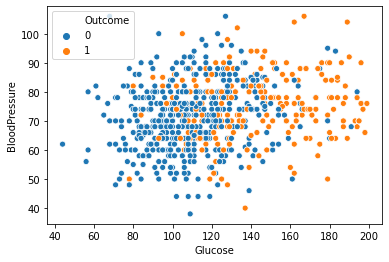

In [26]:
sns.scatterplot(df['Glucose'],df['BloodPressure'],hue=df['Outcome'])

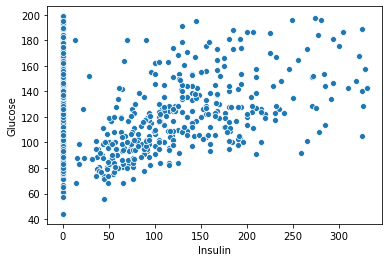

In [27]:
sns.scatterplot(df['Insulin'],df['Glucose'])

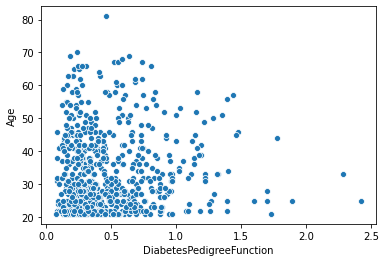

In [28]:
sns.scatterplot(df['DiabetesPedigreeFunction'],df['Age'])

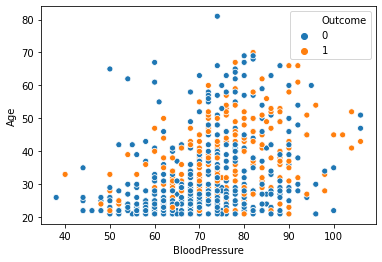

In [29]:
sns.scatterplot(df['BloodPressure'],df['Age'],hue=df['Outcome'])

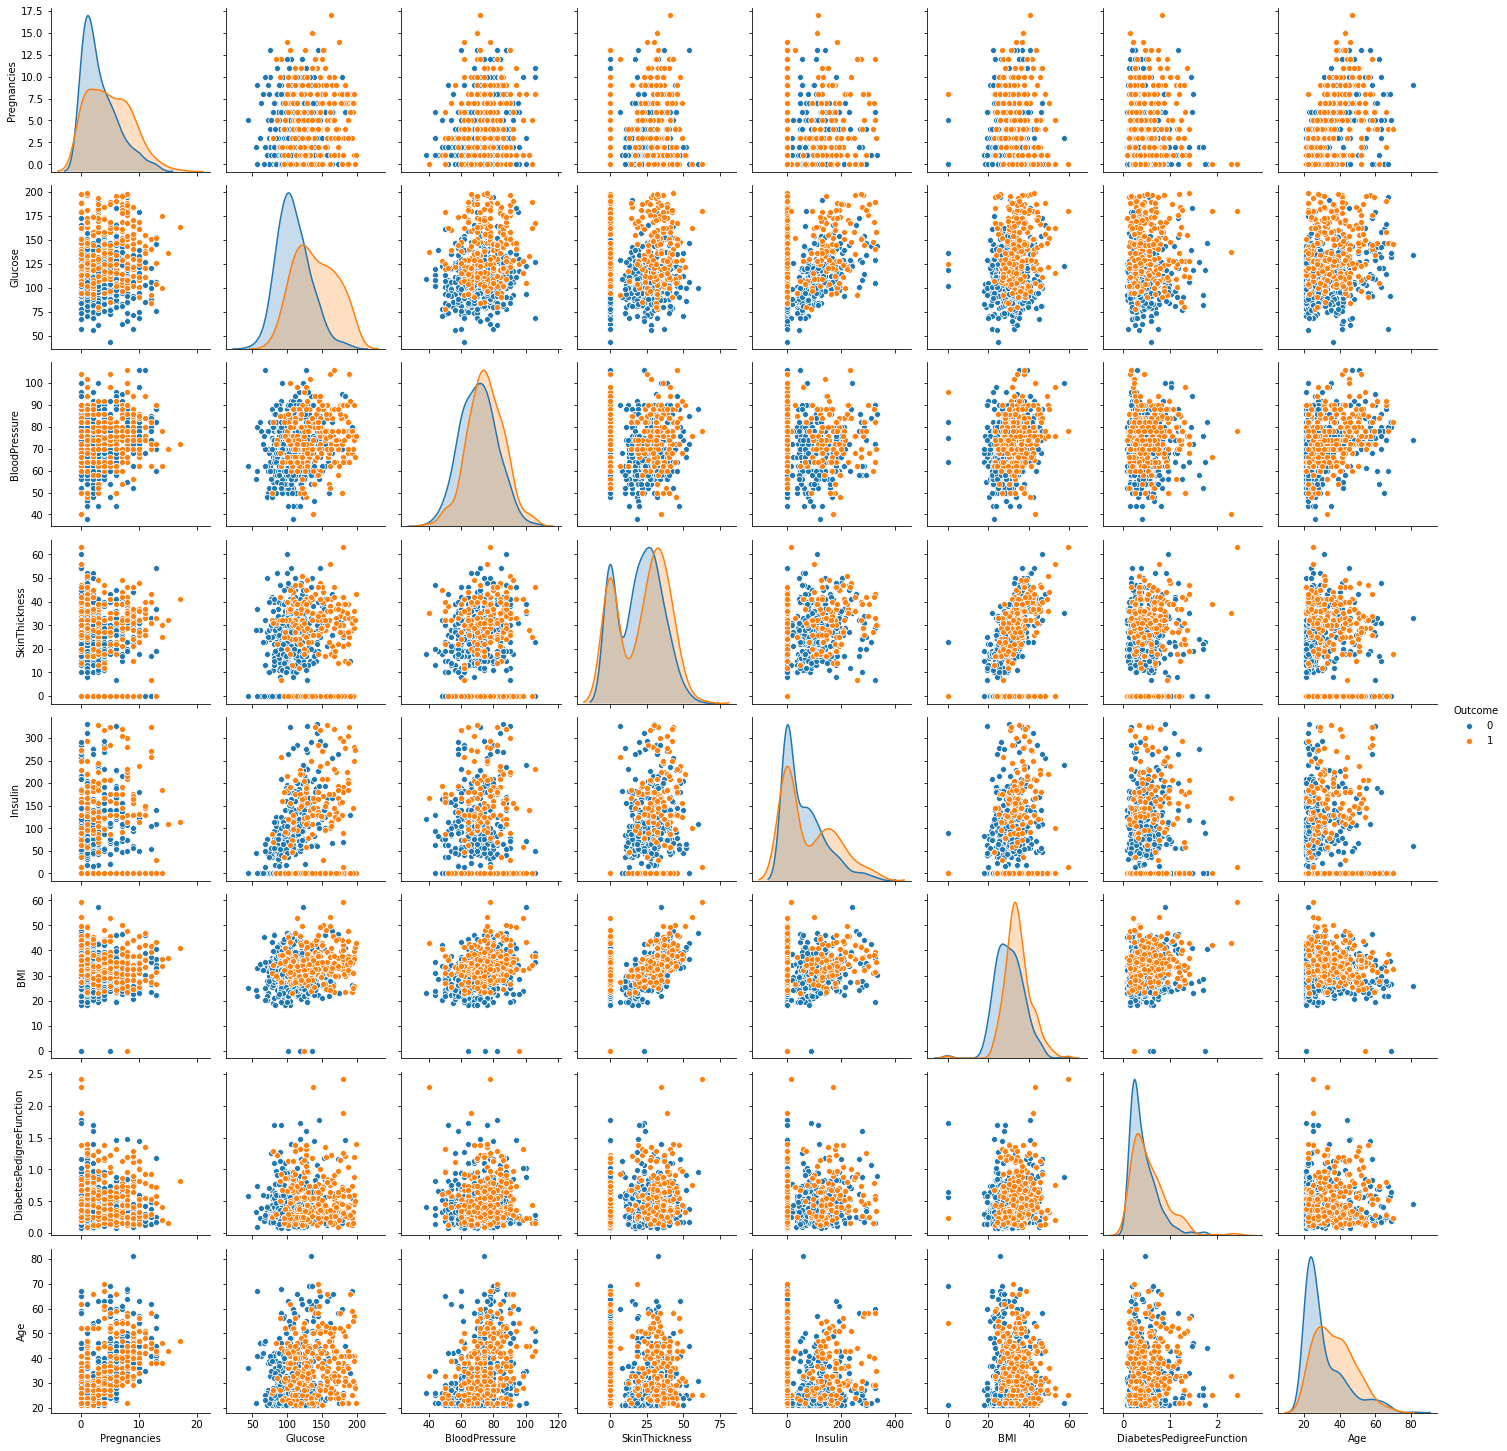

In [30]:
sns.pairplot(df,hue='Outcome')

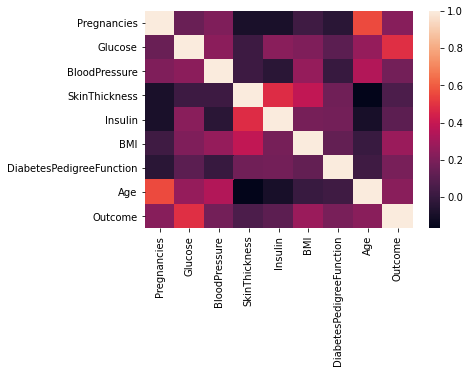

In [31]:
corrmat=df.corr()
sns.heatmap(corrmat)

In [32]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']

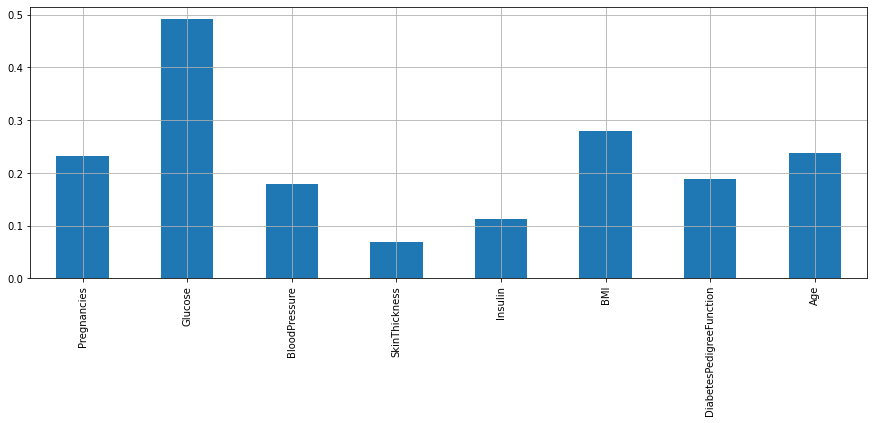

In [33]:
x.corrwith(y).plot.bar(figsize=(15,5),grid=True)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred=gn.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[106  28]
 [ 30  43]]
0.7198067632850241
